# Ränder von Beschriftungen
Bei der Verarbeitung biologischer Objekte in Bildern wie Zellen und Zellkernen kann es sinnvoll sein, alle Pixel zu identifizieren, die auf der Oberfläche eines Objekts liegen.
Dieses Notebook zeigt, wie man Pixel am Rand von Zellkernen auswählt, falls wir die Intensität in der Kernhülle messen möchten.

In [2]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread

cl.OCLArray([[20., 17., 17., ..., 28., 23., 20.],
       [23., 26., 18., ..., 23., 30., 20.],
       [16., 22., 16., ..., 31., 22., 42.],
       ...,
       [36., 35., 36., ..., 49., 38., 46.],
       [38., 27., 38., ..., 43., 40., 49.],
       [38., 39., 40., ..., 44., 36., 44.]], dtype=float32)
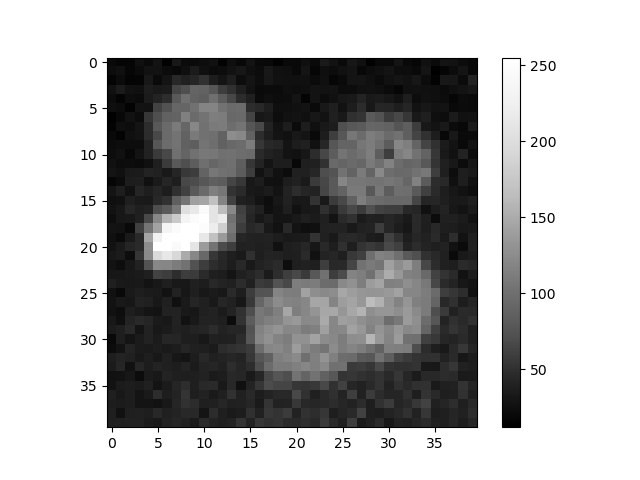
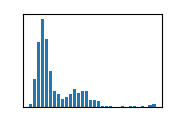

In [21]:
image = cle.asarray(imread("../../data/mitosis_mod.tif")[0:40,25:65])
image

Dann segmentieren wir die Zellkerne.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
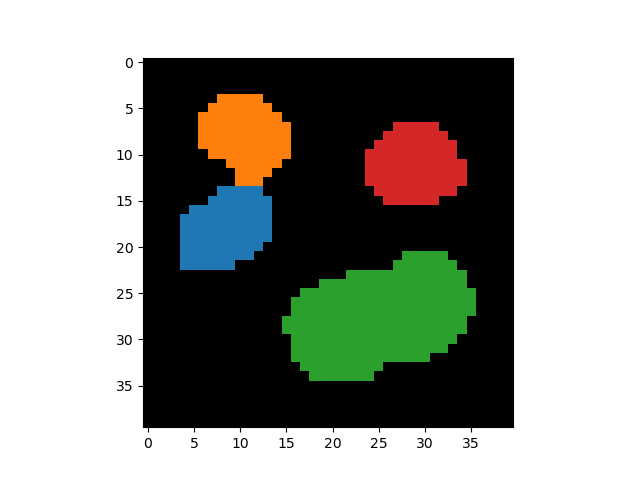

In [27]:
label_image = cle.voronoi_otsu_labeling(image, spot_sigma=2, outline_sigma=1)
label_image

Aus dem Zellkern-Beschriftungsbild können wir ein weiteres Beschriftungsbild extrahieren, das alle Pixel enthält, die sich am Rand der Beschriftungen befinden.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
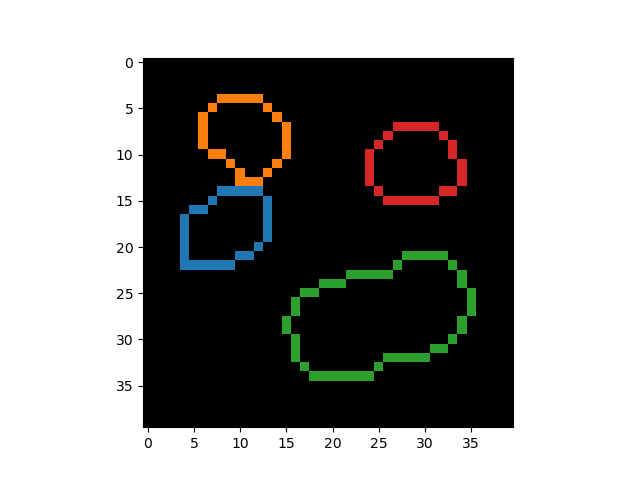

In [28]:
edge_label_image = cle.reduce_labels_to_label_edges(label_image)
edge_label_image

Falls man in dickeren Bereichen entlang der Ränder messen möchte, könnten wir die Ränder erweitern.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
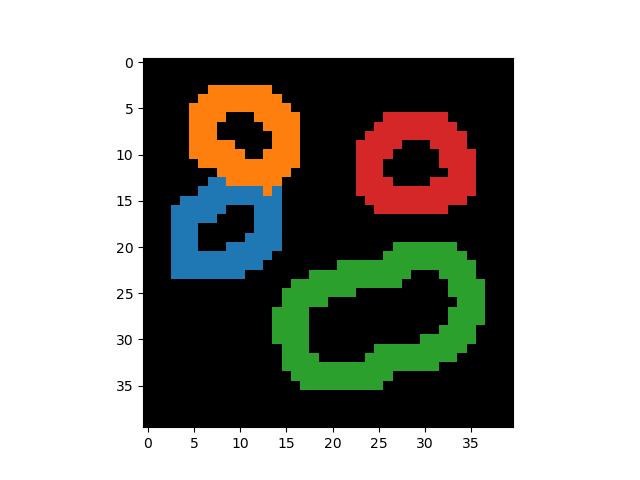

In [31]:
thicker_edges = cle.dilate_labels(edge_label_image, radius=1)
thicker_edges

Zu Visualisierungszwecken können wir auch das Originalbild mit den Beschriftungsrändern darüber anzeigen.

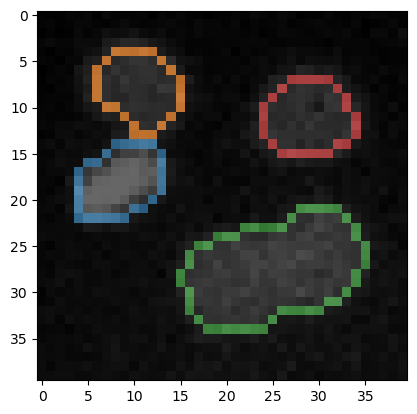

In [34]:
cle.imshow(image, continue_drawing=True)
cle.imshow(edge_label_image, alpha=0.6, labels=True)